# Data Analysis and Visualization on Monkeypox Data

Monkeypox is an infection caused by a virus that is in the same family as the smallpox virus. But monkeypox is far less severe than smallpox, though it causes a similar illness that involves flu-like symptoms and a rash accompanied by lesions. We will be analyzing data download from [statistica](https://www.statista.com/statistics/1311194/monkeypox-reported-cases-in-europe/), about monkeypox data for May and June in 2022.

In [68]:
# Import the various libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
mk_df = pd.read_csv('MonkeyFox.csv')

# Statistical Summary

In [3]:
mk_df.shape

(1000, 31)

In [4]:
# Increase the maximum display of columns
pd.set_option('display.max_columns', 500)

In [5]:
mk_df.head()

ID     Status                             Location    City  Country  Age  \
0   1  confirmed  Guy's and St Thomas Hospital London  London  England  NaN   
1   2  confirmed  Guy's and St Thomas Hospital London  London  England  NaN   
2   3  confirmed                               London  London  England  NaN   
3   4  confirmed                               London  London  England  NaN   
4   5  confirmed                               London  London  England  NaN   

  Gender  Date_onset Date_confirmation        Symptoms Hospitalised (Y/N/NA)  \
0    NaN  29/04/2022        06/05/2022            rash                     Y   
1    NaN  05/05/2022        12/05/2022            rash                     Y   
2    NaN  30/04/2022        13/05/2022  vesicular rash                     N   
3   male         NaN        15/05/2022  vesicular rash                     Y   
4   male         NaN        15/05/2022  vesicular rash                     Y   

  Date_hospitalisation Isolated (Y/N/NA) Date_isolation Outcome  \
0           04/05/2022                 Y     04/05/2022     NaN   
1           06/05/2022                 Y     09/05/2022     NaN   
2                  NaN                 Y            NaN     NaN   
3                  NaN                 Y            NaN     NaN   
4                  NaN                 Y            NaN     NaN   

                   Contact_comment  Contact_ID Contact_location  \
0                              NaN         NaN              NaN   
1  Index Case of household cluster         3.0        Household   
2                              NaN         2.0        Household   
3              Under investigation         NaN              NaN   
4              Under investigation         NaN              NaN   

  Travel_history (Y/N/NA) Travel_history_entry Travel_history_start  \
0                       Y           04/05/2022           late April   
1                       N                  NaN                  NaN   
2                       N                  NaN                  NaN   
3                       N                  NaN                  NaN   
4                       N                  NaN                  NaN   

  Travel_history_location Travel_history_country   Genomics_Metadata  \
0  Lagos and Delta States                Nigeria  West African Clade   
1                     NaN                    NaN  West African Clade   
2                     NaN                    NaN  West African Clade   
3                     NaN                    NaN  West African Clade   
4                     NaN                    NaN  West African Clade   

  Confirmation_method                                             Source  \
0              RT-PCR  https://www.gov.uk/government/news/monkeypox-c...   
1              RT-PCR  https://www.gov.uk/government/news/monkeypox-c...   
2              RT-PCR  https://www.gov.uk/government/news/monkeypox-c...   
3                 NaN  https://www.gov.uk/government/news/monkeypox-c...   
4                 NaN  https://www.gov.uk/government/news/monkeypox-c...   

                                           Source_II  Date_entry  \
0  https://www.who.int/emergencies/disease-outbre...  18/05/2022   
1                                                NaN  18/05/2022   
2                                                NaN  18/05/2022   
3                                                NaN  18/05/2022   
4                                                NaN  18/05/2022   

  Date_last_modified Source_III Country_ISO3  
0         18/05/2022        NaN          GBR  
1         18/05/2022        NaN          GBR  
2         18/05/2022        NaN          GBR  
3         18/05/2022        NaN          GBR  
4         18/05/2022        NaN          GBR

In [6]:
mk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1000 non-null   int64  
 1   Status                   1000 non-null   object 
 2   Location                 413 non-null    object 
 3   City                     321 non-null    object 
 4   Country                  1000 non-null   object 
 5   Age                      160 non-null    object 
 6   Gender                   313 non-null    object 
 7   Date_onset               7 non-null      object 
 8   Date_confirmation        780 non-null    object 
 9   Symptoms                 109 non-null    object 
 10  Hospitalised (Y/N/NA)    122 non-null    object 
 11  Date_hospitalisation     13 non-null     object 
 12  Isolated (Y/N/NA)        130 non-null    object 
 13  Date_isolation           11 non-null     object 
 14  Outcome                  

In [7]:
mk_df.describe(include='all')

ID     Status Location    City Country    Age Gender  \
count   1000.000000       1000      413     321    1000    160    313   
unique          NaN          3      109      75      45     24      3   
top             NaN  confirmed   Madrid  Madrid   Spain  20-61   male   
freq            NaN        780       92     121     304     60    304   
mean     500.500000        NaN      NaN     NaN     NaN    NaN    NaN   
std      288.819436        NaN      NaN     NaN     NaN    NaN    NaN   
min        1.000000        NaN      NaN     NaN     NaN    NaN    NaN   
25%      250.750000        NaN      NaN     NaN     NaN    NaN    NaN   
50%      500.500000        NaN      NaN     NaN     NaN    NaN    NaN   
75%      750.250000        NaN      NaN     NaN     NaN    NaN    NaN   
max     1000.000000        NaN      NaN     NaN     NaN    NaN    NaN   

        Date_onset Date_confirmation               Symptoms  \
count            7               780                    109   
unique           6                20                     28   
top     29/04/2022        30/05/2022  genital ulcer lesions   
freq             2               123                     30   
mean           NaN               NaN                    NaN   
std            NaN               NaN                    NaN   
min            NaN               NaN                    NaN   
25%            NaN               NaN                    NaN   
50%            NaN               NaN                    NaN   
75%            NaN               NaN                    NaN   
max            NaN               NaN                    NaN   

       Hospitalised (Y/N/NA) Date_hospitalisation Isolated (Y/N/NA)  \
count                    122                   13               130   
unique                     2                    8                 1   
top                        Y           22/05/2022                 Y   
freq                      63                    3               130   
mean                     NaN                  NaN               NaN   
std                      NaN                  NaN               NaN   
min                      NaN                  NaN               NaN   
25%                      NaN                  NaN               NaN   
50%                      NaN                  NaN               NaN   
75%                      NaN                  NaN               NaN   
max                      NaN                  NaN               NaN   

       Date_isolation    Outcome      Contact_comment  Contact_ID  \
count              11          1                   35    4.000000   
unique              8          1                   15         NaN   
top        26/05/2022  Recovered  Under investigation         NaN   
freq                4          1                   12         NaN   
mean              NaN        NaN                  NaN   51.000000   
std               NaN        NaN                  NaN   56.005952   
min               NaN        NaN                  NaN    2.000000   
25%               NaN        NaN                  NaN    2.750000   
50%               NaN        NaN                  NaN   51.000000   
75%               NaN        NaN                  NaN   99.250000   
max               NaN        NaN                  NaN  100.000000   

       Contact_location Travel_history (Y/N/NA) Travel_history_entry  \
count                 4                     115                   11   
unique                3                       2                   10   
top           Household                       Y           16/05/2022   
freq                  2                      67                    2   
mean                NaN                     NaN                  NaN   
std                 NaN                     NaN                  NaN   
min                 NaN                     NaN                  NaN   
25%                 NaN                     NaN                  NaN   
50%                 NaN                     NaN      

# Visualization Summary

In [8]:
# sns.set_style("dark")
# sns.set_context("poster",font_scale = 1.5)
# mk_df.Country.value_counts().plot(kind='bar', color='red',figsize=(30,25), alpha=1.0)
# plt.title('Countries Contaminated with MonkeyPox', fontsize=50, fontweight='bold')
# plt.xlabel('Countries', fontweight='bold', fontsize=40)
# plt.ylabel('Occurrence', fontweight='bold', fontsize=40)
# plt.show()

<AxesSubplot:>

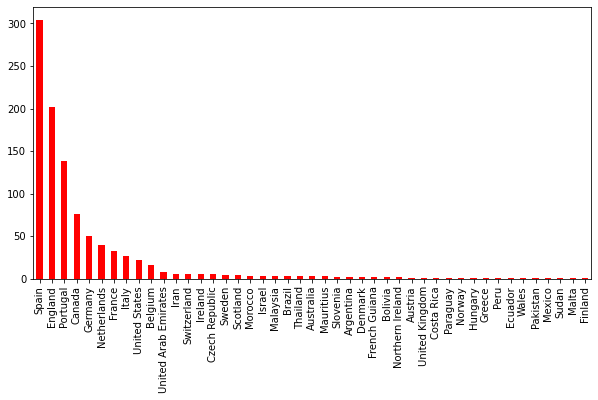

In [9]:
mk_df.Country.value_counts().plot(kind='bar', color='red',figsize=(10,5))

Spain has the highest number of cases for Monkeypox in Europe

In [10]:
pd.set_option('display.max_row',1000)

# Data Cleaning

In [11]:
# Check the sum of missing values
mk_df.isnull().sum()

ID                           0
Status                       0
Location                   587
City                       679
Country                      0
Age                        840
Gender                     687
Date_onset                 993
Date_confirmation          220
Symptoms                   891
Hospitalised (Y/N/NA)      878
Date_hospitalisation       987
Isolated (Y/N/NA)          870
Date_isolation             989
Outcome                    999
Contact_comment            965
Contact_ID                 996
Contact_location           996
Travel_history (Y/N/NA)    885
Travel_history_entry       989
Travel_history_start       996
Travel_history_location    977
Travel_history_country     968
Genomics_Metadata          976
Confirmation_method        914
Source                       2
Source_II                  759
Date_entry                   2
Date_last_modified           2
Source_III                 976
Country_ISO3                 0
dtype: int64

In [12]:
# filtering columns with 80% missing values
for col in list(mk_df.columns):
    if int(mk_df[col].isna().sum()) > (len(mk_df)*0.8):
        mk_df = mk_df.drop(col,axis=1)
mk_df.isnull().sum()


ID                      0
Status                  0
Location              587
City                  679
Country                 0
Gender                687
Date_confirmation     220
Source                  2
Source_II             759
Date_entry              2
Date_last_modified      2
Country_ISO3            0
dtype: int64

In [13]:
# Drop other columns not needed
mk_df.drop(['ID','Location','Source','Source_II','Date_entry','Date_last_modified','City','Country_ISO3'], axis=1, inplace=True)

In [14]:
mk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Status             1000 non-null   object
 1   Country            1000 non-null   object
 2   Gender             313 non-null    object
 3   Date_confirmation  780 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


In [15]:
mk_df.Gender.unique()

array([nan, 'male', 'female', 'Male'], dtype=object)

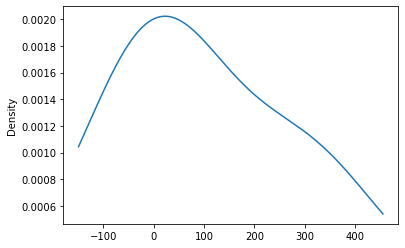

In [16]:
mk_df.Gender.value_counts().plot(kind='density')
plt.show()

The gender column needs to be cleaned and the missing values will be handles

In [17]:
mk_df.Gender = mk_df['Gender'].str.replace('FEMALE','female').str.replace('Male','male').str.replace('Female','female').str.replace('famale','female')

In [18]:
mk_df.Gender.unique()

array([nan, 'male', 'female'], dtype=object)

The location column will act as a good predictor, because having monkeypox in a particular country might also depend on the location in that particular country.  The country column contains so many missing values and we can use the country column instead for our prediction.

In [19]:
mk_df.Country.unique()

array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'United Kingdom', 'Mauritius'], dtype=object)

The Country column is clean and doesnt have any missing value

The Country_ISO3 column will act as noise to our data, because it is very similar to country column names, we have to drop one of them


In [20]:
mk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Status             1000 non-null   object
 1   Country            1000 non-null   object
 2   Gender             313 non-null    object
 3   Date_confirmation  780 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


In [21]:
mk_df['Date_confirmation']

0      06/05/2022
1      12/05/2022
2      13/05/2022
3      15/05/2022
4      15/05/2022
5      15/05/2022
6      15/05/2022
7      17/05/2022
8      17/05/2022
9      17/05/2022
10     18/05/2022
11     18/05/2022
12     18/05/2022
13     18/05/2022
14     18/05/2022
15     18/05/2022
16     18/05/2022
17     18/05/2022
18     18/05/2022
19     18/05/2022
20     18/05/2022
21     19/05/2022
22     19/05/2022
23     19/05/2022
24     19/05/2022
25     19/05/2022
26     19/05/2022
27     18/05/2022
28     18/05/2022
29     18/05/2022
30     18/05/2022
31     18/05/2022
32     18/05/2022
33     18/05/2022
34     25/05/2022
35     18/05/2022
36     18/05/2022
37     18/05/2022
38     23/05/2022
39     23/05/2022
40     23/05/2022
41     23/05/2022
42     23/05/2022
43     23/05/2022
44     23/05/2022
45     23/05/2022
46     23/05/2022
47     23/05/2022
48     26/05/2022
49     26/05/2022
50     26/05/2022
51     20/05/2022
52     20/05/2022
53     20/05/2022
54     20/05/2022
55     20/

The Date_confirmation column will be splitted into three columns day, month, and year and we be used as predictors for the target Status column

In [22]:
mk_df[['day','month','year']] =mk_df['Date_confirmation'].str.split('/',expand=True).astype('Int64')
mk_df.head()

Status  Country Gender Date_confirmation  day  month  year
0  confirmed  England    NaN        06/05/2022    6      5  2022
1  confirmed  England    NaN        12/05/2022   12      5  2022
2  confirmed  England    NaN        13/05/2022   13      5  2022
3  confirmed  England   male        15/05/2022   15      5  2022
4  confirmed  England   male        15/05/2022   15      5  2022

In [23]:
mk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Status             1000 non-null   object
 1   Country            1000 non-null   object
 2   Gender             313 non-null    object
 3   Date_confirmation  780 non-null    object
 4   day                780 non-null    Int64 
 5   month              780 non-null    Int64 
 6   year               780 non-null    Int64 
dtypes: Int64(3), object(4)
memory usage: 57.7+ KB


In [24]:
mk_df.day.unique()

<IntegerArray>
[   6,   12,   13,   15,   17,   18,   19,   25,   23,   26,   20, <NA>,   21,
   24,   30,   27,   29,   31,   28,    1,    2]
Length: 21, dtype: Int64

In [25]:
mk_df.month.unique()

<IntegerArray>
[5, <NA>, 6]
Length: 3, dtype: Int64

In [26]:
mk_df.year.unique()

<IntegerArray>
[2022, <NA>]
Length: 2, dtype: Int64

- The year column has all values as 2022. Hence the missing value will be replaced with 2022
- The day and month column different values, the values will be explored to determine the best way to handle the missing value. If it is a normal distribution, the mean will be used to replace missing values but for skewed(right of left) data, median is always desirable to replace missing values.

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

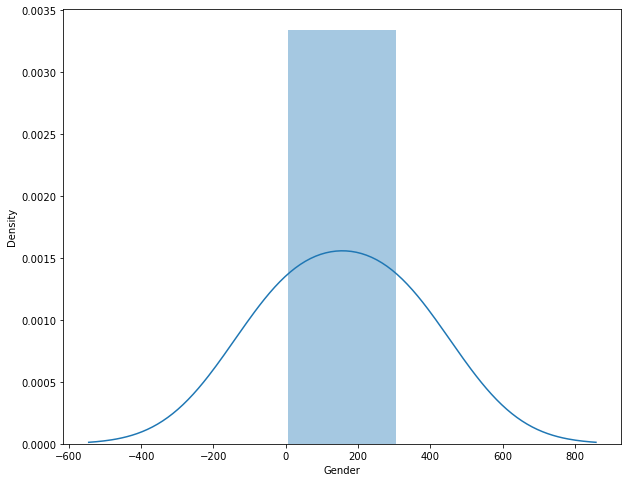

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(mk_df.Gender.value_counts())
plt.show()

[]

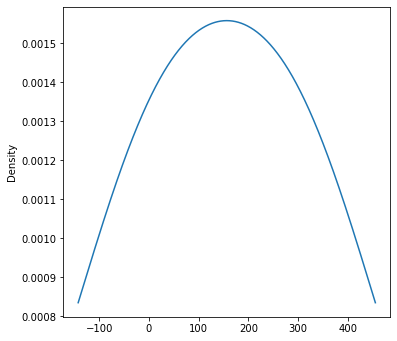

In [29]:
mk_df.Gender.value_counts().plot(kind='density', sharex=True, layout=(3,3), subplots=True, figsize=(15,14))
plt.tight_layout()
plt.plot()

[]

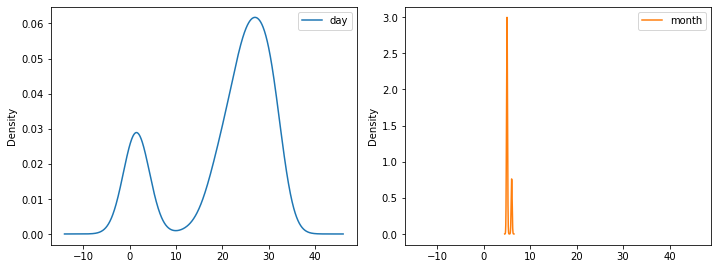

In [30]:
mk_df[['day','month']].plot(kind='density', sharex=True, layout=(3,3), subplots=True, figsize=(15,11))
plt.tight_layout()
plt.plot()

**The day column is skewed while the month is normally distributred**

In [31]:
mk_df.median()

day        25.0
month       5.0
year     2022.0
dtype: float64

# Data Cleaning and Preprocessing

In [32]:
mk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Status             1000 non-null   object
 1   Country            1000 non-null   object
 2   Gender             313 non-null    object
 3   Date_confirmation  780 non-null    object
 4   day                780 non-null    Int64 
 5   month              780 non-null    Int64 
 6   year               780 non-null    Int64 
dtypes: Int64(3), object(4)
memory usage: 57.7+ KB


The following columns will be dropped
- ID : The ID column although numeric adds nothing but noise to our data. The model might be biased towards how the data appears in our dataset
- Location : It will be dropped because it contains more than 60% of missing values and the Country column will be enough to get the location. The location column will act as noise when making predictions
- Date_confirmation: This column has been split into three. The day, month and year column, it can ow be dropped
- Source: The source conlumn is an object column and will not be useful in our data.
- Date_entry: The date entry will not also be useful in our data
- Date_last_modified: Will also act as noise in our data
- Country_ISO3: This column will serve same purpose as the country column. Hence it will act as noise to our data

In [33]:
#mk_df.drop(['ID','Location','Source','Source_II','Date_entry','Date_last_modified','City','Country_ISO3'], axis=1, inplace=True)

In [34]:
mk_df.head()

Status  Country Gender Date_confirmation  day  month  year
0  confirmed  England    NaN        06/05/2022    6      5  2022
1  confirmed  England    NaN        12/05/2022   12      5  2022
2  confirmed  England    NaN        13/05/2022   13      5  2022
3  confirmed  England   male        15/05/2022   15      5  2022
4  confirmed  England   male        15/05/2022   15      5  2022

In [35]:
mk_df.Status.unique()

array(['confirmed', 'discarded', 'suspected'], dtype=object)

In [36]:
mk_df.Country.unique()

array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'United Kingdom', 'Mauritius'], dtype=object)

In [37]:
mk_df.Gender.unique()

array([nan, 'male', 'female'], dtype=object)

In [38]:
print(mk_df.day.unique())
print(mk_df.month.unique())
print(mk_df.year.unique())

<IntegerArray>
[   6,   12,   13,   15,   17,   18,   19,   25,   23,   26,   20, <NA>,   21,
   24,   30,   27,   29,   31,   28,    1,    2]
Length: 21, dtype: Int64
<IntegerArray>
[5, <NA>, 6]
Length: 3, dtype: Int64
<IntegerArray>
[2022, <NA>]
Length: 2, dtype: Int64


In [39]:
#df.Gender = df.fillna(df.Gender.mode().iloc[0])

In [40]:
mk_df.Gender=mk_df.Gender.fillna(mk_df.Gender.mode().iloc[0])

In [41]:
mk_df.Gender.value_counts()

male      993
female      7
Name: Gender, dtype: int64

In [44]:
mk_df[['day','month','year']]=mk_df[['day','month','year']].fillna(mk_df[['day','month','year']].median())

In [45]:
mk_df['day']=mk_df.day.fillna(mk_df.day.median())
mk_df['month']=mk_df.month.fillna(mk_df.month.mean())

In [46]:
mk_df.drop(['Date_confirmation'], axis=1, inplace=True)

In [47]:
mk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Status   1000 non-null   object
 1   Country  1000 non-null   object
 2   Gender   1000 non-null   object
 3   day      1000 non-null   Int64 
 4   month    1000 non-null   Int64 
 5   year     1000 non-null   Int64 
dtypes: Int64(3), object(3)
memory usage: 49.9+ KB


In [48]:
mk_df.shape

(1000, 6)

In [49]:
mk_df.describe(include='all')

Status Country Gender          day        month    year
count        1000    1000   1000  1000.000000  1000.000000  1000.0
unique          3      45      2          NaN          NaN     NaN
top     confirmed   Spain   male          NaN          NaN     NaN
freq          780     304    993          NaN          NaN     NaN
mean          NaN     NaN    NaN    21.739000     5.158000  2022.0
std           NaN     NaN    NaN     9.374047     0.364924     0.0
min           NaN     NaN    NaN     1.000000     5.000000  2022.0
25%           NaN     NaN    NaN    20.000000     5.000000  2022.0
50%           NaN     NaN    NaN    25.000000     5.000000  2022.0
75%           NaN     NaN    NaN    27.000000     5.000000  2022.0
max           NaN     NaN    NaN    31.000000     6.000000  2022.0

In [50]:
mk_df.to_excel('Cleaned_monkeypox.xlsx')

In [51]:
cross_tab = pd.crosstab(mk_df['Country'], mk_df['Gender'])

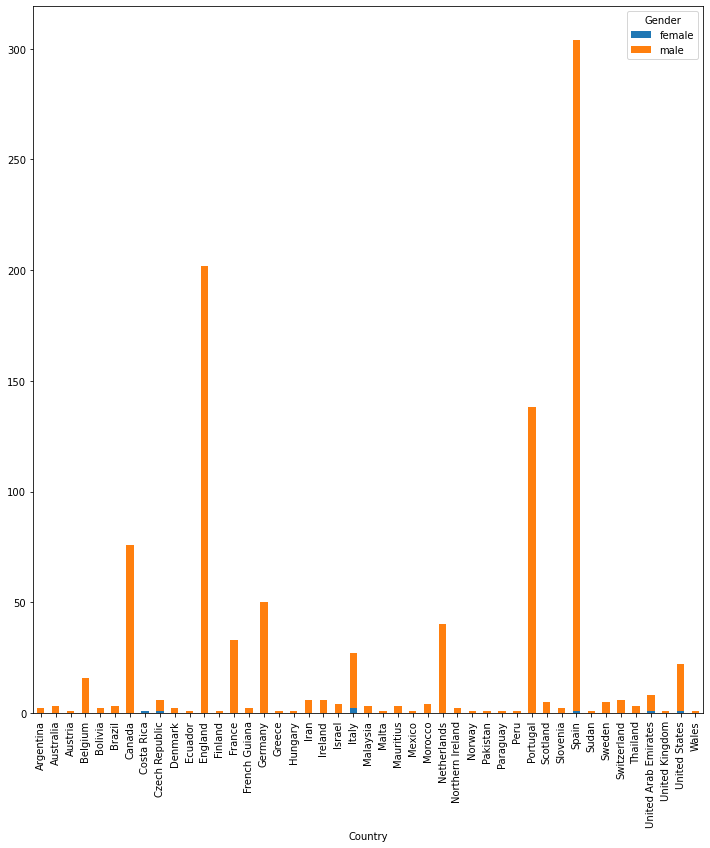

In [52]:
cross_tab.plot(kind='bar', stacked=True, figsize=(12,13))
#cross_tab.plot(kind='bar', stacked=True, figsize=(12,13))
plt.show()

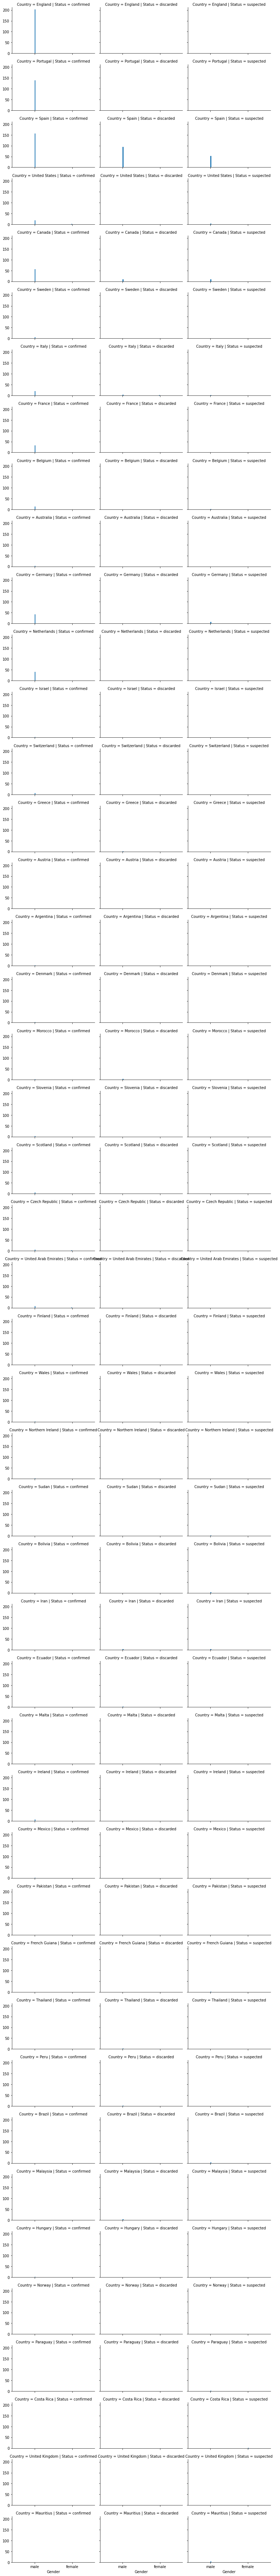

In [53]:
grid = sns.FacetGrid(mk_df, col='Status', row='Country', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Gender', alpha=1.0, bins=40)
grid.tight_layout()
grid.add_legend()

In [54]:
len(mk_df.Country.unique())

45

In [55]:
mk_df[mk_df.Country=='England'].shape

(202, 6)

# Encoding Categorical data

In [56]:
mk_df.head()

Status  Country Gender  day  month  year
0  confirmed  England   male    6      5  2022
1  confirmed  England   male   12      5  2022
2  confirmed  England   male   13      5  2022
3  confirmed  England   male   15      5  2022
4  confirmed  England   male   15      5  2022

In [57]:
lr = LabelEncoder()
mk_df['Status']= lr.fit_transform(mk_df['Status'])
mk_df['Country']=lr.fit_transform(mk_df['Country'])
mk_df['Gender']=lr.fit_transform(mk_df['Gender'])

In [58]:
mk_df.head()

Status  Country  Gender  day  month  year
0       0       11       1    6      5  2022
1       0       11       1   12      5  2022
2       0       11       1   13      5  2022
3       0       11       1   15      5  2022
4       0       11       1   15      5  2022

In [59]:
X = mk_df[['Country','Gender','day','month','year']]
y = mk_df.Status

In [60]:
kn = KNeighborsClassifier()
lr = LogisticRegression()
svc = SVC()
dc = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()

In [61]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.3, random_state=2)

In [62]:
rf.fit(train_X, train_y)
dc.fit(train_X, train_y)
svc.fit(train_X, train_y)
kn.fit(train_X, train_y)
nb.fit(train_X, train_y)
lr.fit(train_X, train_y)

LogisticRegression()

In [63]:
rf_prediction = rf.predict(test_X)
dc_prediction = dc.predict(test_X)
svc_prediction = svc.predict(test_X)
kn_prediction = kn.predict(test_X)
nb_prediction = nb.predict(test_X)
lr.prediction = lr.predict(test_X)

In [64]:
acc_rf = rf.score(test_X, test_y)
acc_dc = dc.score(test_X, test_y)
acc_svc= svc.score(test_X, test_y)
acc_kn = kn.score(test_X, test_y)
acc_nb = nb.score(test_X, test_y)
acc_lr = lr.score(test_X, test_y)

In [65]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Support Vector Machines', 'KNN', 'Naive Bayes', 'Logistic Regression'],
    'Score': [acc_rf, acc_dc, acc_svc, acc_kn, acc_nb, acc_lr]})

models.sort_values(by='Score', ascending=False)


Model     Score
0            Random Forest  0.910000
1            Decision Tree  0.906667
3                      KNN  0.890000
4              Naive Bayes  0.880000
2  Support Vector Machines  0.780000
5      Logistic Regression  0.780000

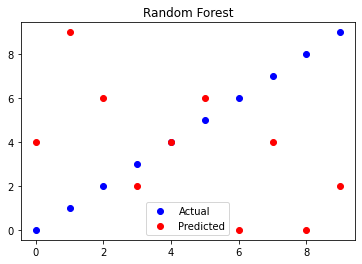

In [66]:
def plotGraph(test_y,rf_prediction,regressorName):
    if max(test_y) >= max(rf_prediction):
        my_range = int(max(test_y))
    else:
        my_range = int(max(rf_prediction))
    plt.scatter(range(len(test_y)), test_y, color='blue')
    plt.scatter(range(len(rf_prediction)), rf_prediction, color='red')
    plt.title(regressorName)
    plt.legend(['Actual','Predicted'])
    plt.show()
    return


test_y = range(10)
rf_prediction = np.random.randint(0, 10, 10)

plotGraph(test_y, rf_prediction, "Random Forest")

# Classification report of Random Forest

In [67]:
print(classification_report(test_y, rf_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.33      1.00      0.50         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.10        10
   macro avg       0.03      0.10      0.05        10
weighted avg       0.03      0.10      0.05        10



C:\Users\bonav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bonav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bonav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
